<a href="https://colab.research.google.com/github/Nidzam81/Computer-Vision/blob/main/yolov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Muhammad Nidzam  
Reference:   Mark Jay  
[Youtube](https://www.youtube.com/watch?v=fSM6cdFQdwI)  
[Github](https://www.youtube.com/redirect?v=fSM6cdFQdwI&event=video_description&q=https%3A%2F%2Fgithub.com%2Fmarkjay4k%2FYOLO-series%2Fblob%2Fmaster%2Fpart2%2520-%2520Processing%2520Images%2520with%2520YOLO%2520and%2520openCV.ipynb&redir_token=1jg3As9pNC7X5_0L9eBclM7kdm98MTU1MTE1MzE0M0AxNTUxMDY2NzQz)  



##  1) Clone the darkflow folder from github





In [ ]:
!git clone https://github.com/thtrieu/darkflow
 

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (1782/1782), done.


In [ ]:
%cd darkflow/

/content/darkflow


## 2) Run the setup command

In [ ]:
!python setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [ ]:
!ls

build  darkflow  flow	     LICENSE	  README.md   setup.py
cfg    demo.gif  labels.txt  preview.png  sample_img  test


## 3) Create bin directory inside darkflow folder 

In [ ]:
!mkdir bin

## 4) Download yolov2 weight and save it in the bin folder

In [ ]:
%cd bin

/content/darkflow/bin


In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2019-02-25 03:33:31--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  6.78MB/s    in 3m 21s  

2019-02-25 03:36:53 (989 KB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
!ls

yolov2.weights


## 5) To run inference, change directory to Darkflow folder and initialize the model

In [ ]:
%cd ..

/content/darkflow


In [ ]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [ ]:
# define the model options and run

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.6,
    'gpu': 1.0
}

tfnet = TFNet(options)

/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.016047239303588867s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

## 6) Download images from internet for inference 

In [ ]:
#download file
!wget https://www.akc.org/wp-content/themes/akc/component-library/assets/img/welcome.jpg
#rename file
!mv welcome.jpg dog.jpg

--2019-02-25 03:55:09--  https://www.akc.org/wp-content/themes/akc/component-library/assets/img/welcome.jpg
Resolving www.akc.org (www.akc.org)... 23.185.0.4, 2620:12a:8000::4, 2620:12a:8001::4
Connecting to www.akc.org (www.akc.org)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27179 (27K) [image/jpeg]
Saving to: ‘welcome.jpg’

welcome.jpg         100%[===================>]  26.54K  --.-KB/s    in 0.005s  

2019-02-25 03:55:09 (5.14 MB/s) - ‘welcome.jpg’ saved [27179/27179]



In [ ]:
# read the color image and covert to RGB

img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)
#show the result
result

[{'bottomright': {'x': 252, 'y': 398},
  'confidence': 0.67330587,
  'label': 'dog',
  'topleft': {'x': 20, 'y': 16}}]

## 7) Single detection inference

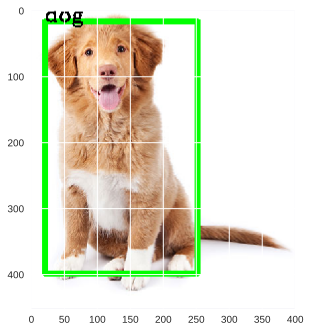

In [ ]:

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

## 8) Multiple detection inference

In [ ]:
#download file
!wget https://bowwowinsurance.com.au/wp-content/uploads/2018/10/cat-and-dog-living-together.jpg.jpg
#rename file
!mv cat-and-dog-living-together.jpg.jpg cats_dogs.jpg

--2019-02-25 04:36:23--  https://bowwowinsurance.com.au/wp-content/uploads/2018/10/cat-and-dog-living-together.jpg.jpg
Resolving bowwowinsurance.com.au (bowwowinsurance.com.au)... 52.62.251.228
Connecting to bowwowinsurance.com.au (bowwowinsurance.com.au)|52.62.251.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63608 (62K) [image/jpeg]
Saving to: ‘cat-and-dog-living-together.jpg.jpg’

cat-and-dog-living- 100%[===================>]  62.12K   111KB/s    in 0.6s    

2019-02-25 04:36:25 (111 KB/s) - ‘cat-and-dog-living-together.jpg.jpg’ saved [63608/63608]



In [ ]:

import numpy as np
# read the color image and covert to RGB
img = cv2.imread('cats_dogs.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# define random colors
colors = [tuple(255 * np.random.rand(3)) for i in range(5)]
# use YOLO to predict the image
results = tfnet.return_predict(img)
#display result
results



[{'bottomright': {'x': 278, 'y': 365},
  'confidence': 0.8385603,
  'label': 'cat',
  'topleft': {'x': 75, 'y': 68}},
 {'bottomright': {'x': 472, 'y': 354},
  'confidence': 0.55647504,
  'label': 'dog',
  'topleft': {'x': 230, 'y': 180}}]

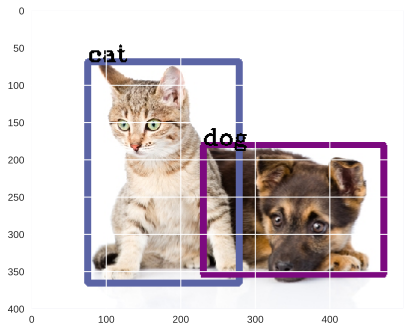

In [ ]:
#loops for each results
for color, result in zip(colors, results):
 tl = (result['topleft']['x'], result['topleft']['y'])
 br = (result['bottomright']['x'], result['bottomright']['y'])
 label = result['label']
 img = cv2.rectangle(img, tl, br, color, 7)
 img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()